In [66]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pymorphy3 import MorphAnalyzer


# Створення хмари символів

Для створення хмари символів треба:

1. Токенізувати текст.
2. Видалити стоп-слова та пунктуацію - фільтрація токенів [^1].
3. Лематизувами слова. Для цього використовується біліотека `pymorphy3` (для python 3.11). Для python 3.10 можна `pymorphy2`.
4. Знайти слова, що найчастіше зустрічаються в тексті за допомогою `nltk`.

[1]: Попередньо треба завантажити список стоп-слів. Приклад [тут](./Hw12_nltk.ipynb).

In [67]:
import os
import requests

# Перевіряємо наявність папки corpora/stopwords у каталозі nltk_data
nltk_data_path = nltk.data.path[0]
stopwords_path = os.path.join(nltk_data_path, "corpora", "stopwords")
if not os.path.exists(stopwords_path):
    os.makedirs(stopwords_path)


# Завантажуємо стоп-слова для української мови та зберігаємо у файл
url = "https://raw.githubusercontent.com/skupriienko/Ukrainian-Stopwords/master/stopwords_ua.txt"
r = requests.get(url)

with open(os.path.join(stopwords_path, "ukrainian"), "wb") as f:
    f.write(r.content)


stop_words = set(stopwords.words("ukrainian"))


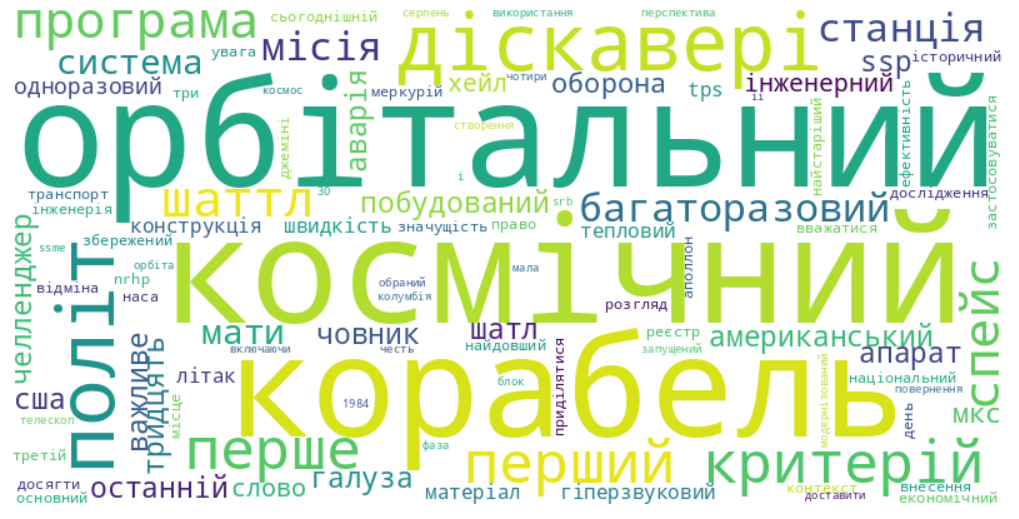

In [78]:
morph = MorphAnalyzer(lang="uk")

with open("text_ua.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Токенізація тексту
tokens = word_tokenize(text)

# Фільтрація токенів
filtered_tokens = [
    word.lower() for word in tokens if word.lower() not in stop_words and word.isalnum()
]


# Лематизація слів
lemmatized_tokens = [morph.parse(token)[0].normal_form for token in filtered_tokens]

freq_dist = FreqDist(lemmatized_tokens)

wordcloud = WordCloud(
    width=800, height=400, background_color="white", max_words=100
).generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("space_shuttle.png")
plt.show()
